# Introduction to PyTorch

## A. Import the modules

In [2]:
import torch # create tensors to store all of the numerical values including the raw data
import torch.nn as nn # used to make weight and bias tensors part of the neural network
import torch.nn.functional as F # gives us the activation functions

from torch.optim import SGD # Stochastic gradient descent, to fit the neural network to the data

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

## B. Create a new neural network

With PyTorch, creating a new neural network means creating a new class.

Since we work with tensors, the neural network can take advantage of the accelerated arithmetic and automatic differentiation that it provides.

* https://pytorch.org/docs/stable/nn.html
* https://pytorch.org/docs/stable/nn.functional.html

We want to create the following neural network:

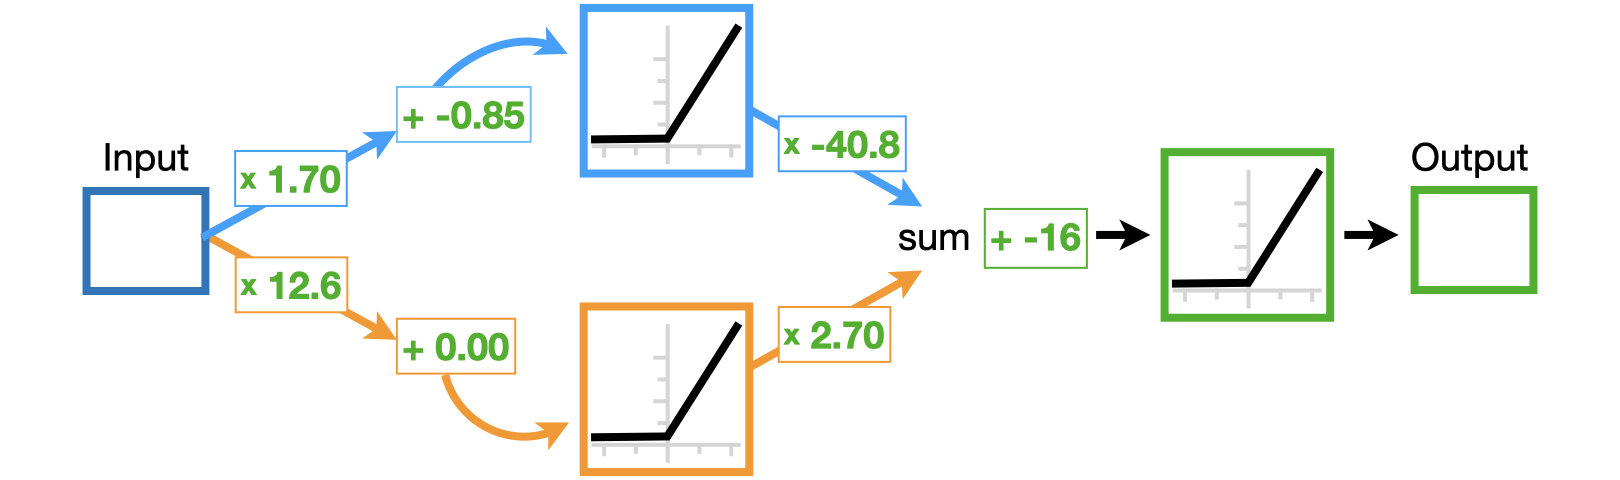

In [3]:
Image("images/simple_relu.001.png")

In [23]:
class BasicNN(nn.Module): # BasicNN will inherit from a PyTorch class called Module
    
    #create an initialization method for the new class
    def __init__(self):
        
        super().__init__() # first thing we do is call the initialization method for the parent class
        
        # initialize the weights and biases in our neural network
        # requires_gradient = True allows us to optimize the parameter
        # https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#torch.nn.parameter.Parameter
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad = False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad = False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad = False)
        
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad = False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad = False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad = False)
        
        self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad = False)
        
    # Now we need to connect the input to the weights, bias, the activation functions and the output
    # In other words, we need a way to make a forward pass through the neural network that uses the
    # weights and biases that were just initialized and takes an input value
    # We do that by creating a second method inside BasicNN called forward
    def forward(self, input):
        
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu) # we pass the top input to the ReLU activation function
        scaled_top_relu_output = top_relu_output * self.w01
        
        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11
        
        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
        
        output = F.relu(input_to_final_relu)
        
        return output

We can now verify that the code works by plugging in a bunch of values between 0 and 1 that represent different dosages and see if the output from forward() results in the following bent shape that fits the training data:

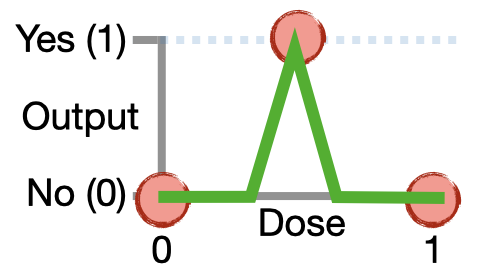

In [4]:
Image("images/training_data_with_bent_shape_500x275.png")

In [24]:
# first, create a sequence of input doses
input_doses = torch.linspace(start = 0, end=1, steps = 11) # create a tensor with a sequence of 11 between 0-1
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [25]:
# The idea is to run the input values through the neural network
# So we make a neural network that we call model, from the class we just created, BasicNN
model = BasicNN()

# now we pass the input doses to the model, which, by default, calls the forward() method
output_values = model(input_doses)

Text(0.5, 0, 'Dose')

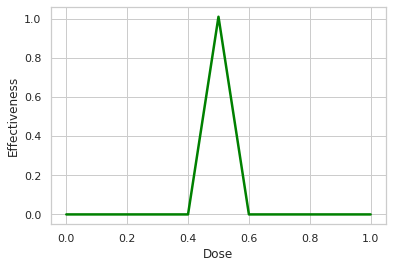

In [26]:
# Draw the dosages vs effectiveness graph
sns.set(style='whitegrid')

sns.lineplot(x=input_doses,
            y=output_values,
            color='green',
            linewidth=2.5)

plt.ylabel('Effectiveness')
plt.xlabel('Dose')

As we see, this is what we expected to get

## C. Test the optimal values

What if we didn't know that the optimal value for the final bias (final_bias parameter) was -16?

First, we set the parameter to 0, and then use PyTorch to optimize the variable with backpropagation.

In [30]:
class BasicNN_train(nn.Module): # BasicNN_train since we want to train this nn
    
    #create an initialization method for the new class
    def __init__(self):
        
        super().__init__() # first thing we do is call the initialization method for the parent class
        
        # initialize the weights and biases in our neural network
        # requires_gradient = True allows us to optimize the parameter
        # https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#torch.nn.parameter.Parameter
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad = False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad = False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad = False)
        
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad = False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad = False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad = False)
        
        # Now we set requires_grad to True, since this parameter is to be optimized 
        self.final_bias = nn.Parameter(torch.tensor(0.), requires_grad = True)
    
    def forward(self, input):
        
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu) # we pass the top input to the ReLU activation function
        scaled_top_relu_output = top_relu_output * self.w01
        
        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11
        
        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
        
        output = F.relu(input_to_final_relu)
        
        return output

We can verify that setting final_bias to 0 results in a neural network that no longer fits the training data by drwaing a graph of the neural network output, just like before.

In [32]:
model = BasicNN_train()

output_values = model(input_doses)

In [35]:
output_values 

tensor([ 0.0000,  3.4020,  6.8040, 10.2060, 13.6080, 17.0100, 13.4760,  9.9420,
         6.4080,  2.8740,  0.0000], grad_fn=<ReluBackward0>)

Since final_bias now has a gradient, we need to call detach() on the output values to create a new tensor that only has the values

In [36]:
output_values.detach()

tensor([ 0.0000,  3.4020,  6.8040, 10.2060, 13.6080, 17.0100, 13.4760,  9.9420,
         6.4080,  2.8740,  0.0000])

Text(0.5, 0, 'Dose')

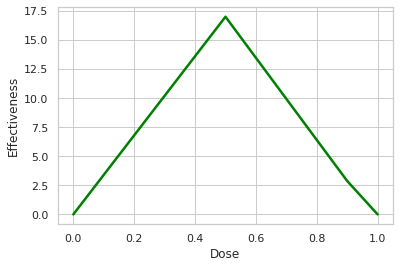

In [34]:
# Draw the dosages vs effectiveness graph
sns.set(style='whitegrid')

sns.lineplot(x=input_doses,
            y=output_values.detach(),
            color='green',
            linewidth=2.5)

plt.ylabel('Effectiveness')
plt.xlabel('Dose')

We see that now, when dose = 0.5 effectivness = 17, which is way to high. That means we need to train the neural network to **optimize the final_bias parameter**

In [38]:
# create the training data
inputs = torch.tensor([0., 0.5, 1.])

# observed output values
labels = torch.tensor([0., 1., 0.])

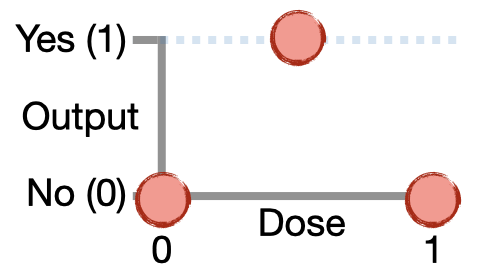

In [5]:
Image("images/training_data_500x275.png")

Now we can optimize the last bias, **final_bias**

In [43]:
eps = 0.0001 # the acceptable tolerance
 
# create optimizer object that uses Stochastic gradient descent
# we pass model.parameters() to SGD() in order to optimize every parameter that has requires_grad=True
optimizer = SGD(model.parameters(), lr = 0.1) 

print('Final bias, before optimization: ' + str(model.final_bias.data) + '\n')

# for loop that does gradient descent
# each time that the optimization code sees all of the data training data we call it an EPOCH
# thus, everytime we run all 3 data points from our training data through the model, we get an epoch
for epoch in range(100):
    
    total_loss = 0 # stores the loss, a measure of how well the model fits the data
    
    # start a nested for loop that runs each data point from the trainign data through the model
    # and calculates the total loss
    for iteration in range(len(inputs)):
        
        input_i = inputs[iteration] # determines its input or dose
        label_i = labels[iteration] # determines its known effectiveness
        
        output_i = model(input_i)
        
        loss = (output_i - label_i)**2 # loss as the squared residual, we could use MSELoss or absolute value loss
        
        # calculates the derivative of the loss function with respect to the parameter or parameters to optimize
        # this adds sequential derivatives, since it remembers the previous derivatives calculated for every points
        # loss.backward() accumulates the derivatives each time we go through the nested loop
        loss.backward() 
        
        total_loss += float(loss)
        
    if (total_loss < eps):
        print('Num steps: ' + str(epoch))
        break # breaks out of the optimization loop to stop training
        
    optimizer.step() # if total_loss is not small enough, we take a step towards better values
    optimizer.zero_grad() # zero out the derivatives stored in the model
                          # otherwise in the next iteration, we would add the new derivatives to the old ones
    
    print('Step: ' + str(epoch) + ' Final Bias: ' + str(model.final_bias.data) + '\n')

print('Total loss: ' + str(total_loss))
print('Final bias, after optimization: ' + str(model.final_bias.data))

Final bias, before optimization: tensor(-16.0019)

Num steps: 0
Total loss: 6.58966600894928e-05
Final bias, after optimization: tensor(-16.0019)


Draw the graph to verify the training model fits the data.
Now we don't create a new model, instead we use the one optimized

Text(0.5, 0, 'Dose')

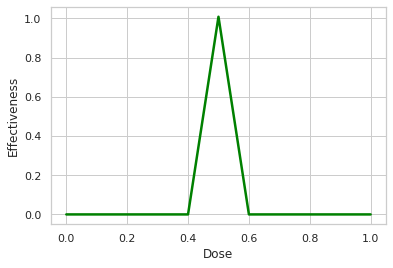

In [44]:
output_values = model(input_doses)

# Draw the dosages vs effectiveness graph
sns.set(style='whitegrid')

sns.lineplot(x=input_doses,
            y=output_values.detach(),
            color='green',
            linewidth=2.5)

plt.ylabel('Effectiveness')
plt.xlabel('Dose')